# Linear Regression Analysis
Analisis Regresi merupakan analisis yang berfungsi untuk **mengetahui dan memodelkan** hubungan antara variabel independen dan variabel dependen. Berbeda dengan korelasi yang hanya mengetahui keeratan hubungan antar variabel, analisis regresi dapat mengetahui berapa besar pengaruh variabel independen ke variabel dependen. Jika X1, X2, X3 dan X4 adalah variabel independen dan variabel Y adalah variabel dependen, maka persamaan regresi dapat digambarakan sebagai berikut

$$Y=a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4}$$


Tujuan utama analisis regresi adalah mendapatkan a0,a1,a2,a3, dan a4 yang terbaik. Definisi terbaik disini adalah nilai error paling kecil diantara nilai lainnya. Pencarian nilai a0, a1 , a2, a3, dan a4 ini sering disebut dengan **"pendugaan parameter"**. Beberapa metode pendugaan parameter yang bisa digunakan adalah metode moment, Ordinary Least Square (OLS), Maximum Likelihood, dan Metode Numerik.

Berdasarkan **teorema Gauss Markov**, jika asumsi klasik regresi terpenuhi (normalitas, non-multikolinieritas, non-autokorelasi, homoskedastisitas), maka metode OLS adalah penduga terbaik dari semua metode. Tapi harus diingat bahwa Y harus bertipe numerik (bukan kategori, jika Y bertipe kategori maka analisis yang cocok adalah regresi logistik)

Dalam project ini, kita akan melakukan analisis regresi dengan cara yang berbeda yaitu
1. OLS ~ Pendekatan Matriks
2. OLS ~ Pendekatan Non-Matriks
3. OLS ~ Package python
4. Metode Numerik



In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import pandas as pd
import zipfile

# DATA PREPARATION

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Kita akan ambil beberapa variabel saja
dfFilter = df[['LotArea','YearBuilt','GrLivArea','1stFlrSF','2ndFlrSF','SalePrice']]

In [4]:
dfFilter

,LotArea,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,SalePrice
0,8450,2003,1710,856,854,208500
1,9600,1976,1262,1262,0,181500
2,11250,2001,1786,920,866,223500
3,9550,1915,1717,961,756,140000
4,14260,2000,2198,1145,1053,250000
...,...,...,...,...,...,...
1455,7917,1999,1647,953,694,175000
1456,13175,1978,2073,2073,0,210000
1457,9042,1941,2340,1188,1152,266500
1458,9717,1950,1078,1078,0,142125


## CARA 1 (Pendekatan Matriks)
Pendugaan parameter menggunakan OLS dengan pendekatan matriks yaitu
$$beta=(X^TX)^{-1}X^TY  $$
jika kita menggunakan slope, maka kita perlu menambahkan kolom baru yang isinya 1 semua

In [5]:
X = np.array(df[['LotArea','YearBuilt','GrLivArea','1stFlrSF','2ndFlrSF']])
Y = np.array(df['SalePrice']).reshape(len(df.SalePrice),1)

In [6]:
ones = np.ones(len(X)).reshape(len(X),1)
XX = np.append(ones,X,axis=1)
print(np.shape(XX))
print(np.shape(Y))

(1460, 6)
(1460, 1)


In [7]:
# koef  = (Xt*X)-1*Xt*Y
koef_m = np.matmul(np.linalg.inv(np.matmul(XX.T,XX)),(np.matmul(XX.T,Y)))
koef_m

array([[-1.85691561e+06],
       [ 5.23470322e-01],
       [ 9.47963982e+02],
       [ 3.49971005e+01],
       [ 8.24026664e+01],
       [ 4.26530830e+01]])

## CARA 2 (OLS pendekatan Non-Matriks)
Analisis regresi dengan pendekatan non-matriks dapat dilakukan dengan cara berikut ini jika variabel X yang digunakan adalah satu variabel, maka
$$\beta_{1}=(\sum XY - \sum X \sum Y/n)/(\sum X^2 - n.\bar{X}^2)$$
$$\beta_{0}=(\bar{Y} -\beta_{1}\bar{X})$$

In [9]:
X1 = X[:,0].reshape(1,-1)

In [13]:
beta1 = (np.matmul(X1,Y) - sum(X1[0])*sum(Y[0])/len(X1))/(sum(X1[0]**2)-len(X1)*(np.mean(X1))**2)
beta0 = np.mean(Y) - beta1*np.mean(X1)
print(beta0,beta1)

[[184974.72588053]] [[-0.38543275]]


## CARA 3 (Menggunakan Package)

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
fit = model.fit(X,Y)

In [15]:
koef_p = np.append(fit.intercept_,fit.coef_).reshape(6,1)
koef_p

array([[-1.85691561e+06],
       [ 5.23470322e-01],
       [ 9.47963982e+02],
       [ 3.49971005e+01],
       [ 8.24026664e+01],
       [ 4.26530830e+01]])

## CARA 4 (Menggunakan Metode Numerik)
Metode ini tergolong cukup rumit karena mengandalkan metode numerik seperti Newton Raphson, Gradient Descent untuk mendapatkan nilai a0,a1,a2,a3, dan a4. Metode ini berusaha untuk mengoptimasi nilai parameter agar menghasilkan error (loss terkecil). Nilai parameter yang terbaik ketika iterasi yang dilakukan menghasilkan konvergensi.

Fungsi loss (MSE) yang digunakan adalah
$$L=\frac{1}{n} \sum(y-\hat{y})^2$$
$$L=\frac{1}{n} \sum(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))^2$$

Jika variabel X yang digunakan hanya 1, maka perhitungan global optimum dapat dihitung dengan cukup mudah. Namun jika variabel X lebih dari 1, maka pencarian global optimum akan melibatkan Matrik Hessian. 

$$ dL/da_{0} = \frac{-2}{n} \sum(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))$$,
$$ dL/da_{1} = \frac{-2}{n} \sum(X_{1})(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))$$,
$$ dL/da_{2} = \frac{-2}{n} \sum(X_{2})(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))$$,
$$ dL/da_{3} = \frac{-2}{n} \sum(X_{3})(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))$$,
$$ dL/da_{4} = \frac{-2}{n} \sum(X_{4})(y-(a_{0} + a_{1}X_{1} + a_{2}X_{2} + a_{3}X_{3} + a_{4}X_{4} ))$$

In [16]:
Lr = 0.0001  # The learning Rate
epochs = 30  # The number of iterations to perform gradient descent
a0=a1=a2=a3=a4=0.05 # Inisiasi
LosA1 = []
n = len(X) # Banyaknya Observasi

for k in range(epochs):
  A = np.array([a0,a1,a2,a3,a4]).reshape(1,-1)

  X1 = X[:,0].reshape(1,-1)
  X2 = X[:,1].reshape(1,-1)
  X3 = X[:,2].reshape(1,-1)
  X4 = X[:,3].reshape(1,-1)

  error = Y - np.matmul(A,X.T).reshape(-1,1)

  sigma0 = sum(error[0])
  sigma1 = np.matmul(X1,error)
  sigma2 = np.matmul(X2,error)
  sigma3 = np.matmul(X3,error)
  sigma4 = np.matmul(X4,error)

  L0 = -2*sigma0
  L1 = -2*sigma1/n
  L2 = -2*sigma2/n
  L3 = -2*sigma3/n
  L4 = -2*sigma4/n

  parameter = [L0,L1[0].item(),L2[0].item(),L3[0].item(),L4[0].item()]

  a0 = a0 - Lr*parameter[0]
  a1 = a1 - Lr*parameter[1]
  a2 = a2 - Lr*parameter[2]
  a3 = a3 - Lr*parameter[3]
  a4 = a4 - Lr*parameter[4]

  print("Epoch ke-{}, Loss : {}".format(k,a1))
  LosA1.append(a1)  

Epoch ke-0, Loss : 419702.357737774
Epoch ke-1, Loss : -2185531630.0954227
Epoch ke-2, Loss : 11499965125096.275
Epoch ke-3, Loss : -6.0507488147225224e+16
Epoch ke-4, Loss : 3.183624324999703e+20
Epoch ke-5, Loss : -1.6750759562690604e+24
Epoch ke-6, Loss : 8.813475375042747e+27
Epoch ke-7, Loss : -4.637243337879795e+31
Epoch ke-8, Loss : 2.4399030869937817e+35
Epoch ke-9, Loss : -1.2837642194217109e+39
Epoch ke-10, Loss : 6.754573900301948e+42
Epoch ke-11, Loss : -3.5539445549582563e+46
Epoch ke-12, Loss : 1.8699213430994997e+50
Epoch ke-13, Loss : -9.838661732920888e+53
Epoch ke-14, Loss : 5.176649009973419e+57
Epoch ke-15, Loss : -2.723713417526258e+61
Epoch ke-16, Loss : 1.4330920961648627e+65
Epoch ke-17, Loss : -7.540268160647636e+68
Epoch ke-18, Loss : 3.967340555895147e+72
Epoch ke-19, Loss : -2.0874312094887766e+76
Epoch ke-20, Loss : 1.0983098105538435e+80
Epoch ke-21, Loss : -5.778798527469775e+83
Epoch ke-22, Loss : 3.0405366591642322e+87
Epoch ke-23, Loss : -1.59978984070

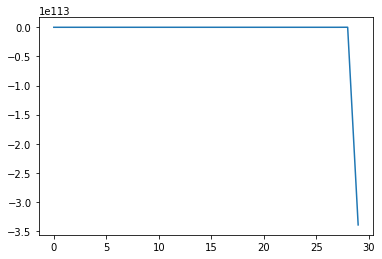

In [17]:
plt.plot(range(epochs),np.array(LosA1))

Hal yang cukup sulit saat menggunakan metode numerik adalah menetapkan inisiasi parameter apalagi jika variabel independen cukup banyak. Nilai inisiasi yang salah bisa menyebabkan konvergensi tiap parameter tidak tercapai. Hal lain yang perlu diperhatikan adalah jika terjebak dalam local optimum.

## CARA 5 (Menggunakan Metode Numerik via pytorch)
An open source machine learning framework that accelerates the path from research prototyping to production deployment.

In [18]:
x = torch.from_numpy(XX).float()
y = torch.from_numpy(Y).float()

In [19]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear  = nn.Linear(input_size,output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [20]:
model = LR(6,1) # Create Model
[a,b] = model.parameters() # Get parameter (weight & bias)

In [21]:
def get_params():
  return a[0][0].item(),a[0][1].item(),a[0][2].item(),a[0][3].item(),a[0][4].item(),b[0].item()

In [22]:
[w1,w2,w3,w4,w5,b]= get_params()
w1 = torch.tensor(w1,requires_grad=True)
w2 = torch.tensor(w2,requires_grad=True)
w3 = torch.tensor(w3,requires_grad=True)
w4 = torch.tensor(w4,requires_grad=True)
w5 = torch.tensor(w5,requires_grad=True)
b = torch.tensor(b,requires_grad=True)

In [23]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.9)

In [24]:
def forward(x):
  y = w1*x +w2*x +w3*x + w4*x + w5*x + b
  return y

In [25]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred,y)
  print("Epoch ke-{}, Loss : {}".format(i,loss))
  losses.append(loss)

  optimizer.zero_grad() # agar tidak diakumulasi nilai gradiennya
  loss.backward()
  optimizer.step()


Epoch ke-0, Loss : 38528188416.0
Epoch ke-1, Loss : 33323358208.0
Epoch ke-2, Loss : 28699195392.0
Epoch ke-3, Loss : 24662052864.0
Epoch ke-4, Loss : 21212223488.0
Epoch ke-5, Loss : 18342060032.0
Epoch ke-6, Loss : 16034120704.0
Epoch ke-7, Loss : 14259139584.0
Epoch ke-8, Loss : 12974440448.0
Epoch ke-9, Loss : 12123177984.0
Epoch ke-10, Loss : 11635120128.0
Epoch ke-11, Loss : 11429539840.0
Epoch ke-12, Loss : 11420302336.0
Epoch ke-13, Loss : 11522569216.0
Epoch ke-14, Loss : 11659860992.0
Epoch ke-15, Loss : 11769886720.0
Epoch ke-16, Loss : 11808004096.0
Epoch ke-17, Loss : 11747962880.0
Epoch ke-18, Loss : 11580301312.0
Epoch ke-19, Loss : 11309305856.0
Epoch ke-20, Loss : 10949304320.0
Epoch ke-21, Loss : 10521026560.0
Epoch ke-22, Loss : 10048312320.0
Epoch ke-23, Loss : 9555411968.0
Epoch ke-24, Loss : 9064861696.0
Epoch ke-25, Loss : 8595929088.0
Epoch ke-26, Loss : 8163595776.0
Epoch ke-27, Loss : 7777987072.0
Epoch ke-28, Loss : 7444262400.0
Epoch ke-29, Loss : 7162883584

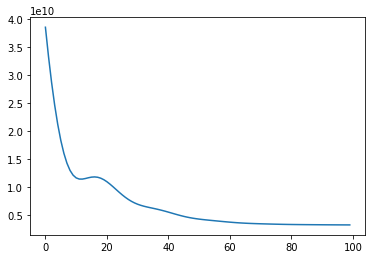

In [26]:
plt.plot(range(epochs),losses)

# Refference
1. https://www.kaggle.com/general/51898
2. https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
3. https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
4. https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
5. https://www.youtube.com/watch?v=HA37MORSoBM